In [1]:
%matplotlib inline

import numpy as np
import scipy as sc
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sympy as sp

import itertools

sns.set();

In [2]:
def extract(it):
    r"""
    Extract the values from a iterable of iterables.
    
    The function extracts the values from a iterable of iterables (eg. a list of tuples) to a list
    of coordinates. For example,
    
    [(1, 10), (2, 20), (3, 30), (4, 40)] -> [[1, 2, 3, 4], [10, 20, 30, 40]]
    
    If `it` is a list of M tuples each one with N elements, then `extract` returns
    a list of N lists each one with M elements.
    
    Parameters
    ----------
    it : iterable
        An iterable of iterables.
        
    Returns
    ------
    A list with the lists of first-elements, second-elements and so on.
    """
    
    return list(zip(*it))

# Runge-Kutta methods

The Runge-Kutta methods are in fact a family of methods designed to solve an ODE of the form:

$$y' = f(t, y)$$

with initial condition

$$y(t_{0}) = y_{0}$$

In other words, an initial condition problem.

## Two-stage Runge-Kutta methods

The so-called two-stage Runge-Kutta method has equations:

$$y_{k+1} = y_{k} + h\left(1 - \frac{1}{2\lambda}k_{1} + \frac{1}{2\lambda}k_{2}\right)$$

where

$$k_{1} = f(x_{k}, y_{k})$$

and

$$k_{2} = f(x_{k} + \lambda h, y_{k} + \lambda h k_{1})$$

The name "two-stage" comes from the fact that it is actually computed in two stages. First, we have to find $k_{1}$. Then we use that value to compute $k_{2}$.

Depending on the value given to $\lambda$, the method has different names. If $\lambda$ equals $1$, then it is called _improved Euler's method_. If $\lambda$ equals $2/3$, then it is called _Heun's method_.

### Improved Euler's method

By making $\lambda$ equals to $1$ in the general equation of the two-stage Runge-Kutta, we get the improved Euler's method. The equations are the following:

$$y_{k+1} = y_{k} + h\left(\frac{1}{2}k_{1} + \frac{1}{2}k_{2}\right)$$

with

$$k_{1} = f(x_{k}, y_{k})$$

and

$$k_{2} = f(x_{k} + h, y_{k} + hk_{1})$$

### Heun's method

As I said, the Heun's method comes from making $\lambda$ equals to $2/3$ in the general formula of the two-stage Runge-Kutta. The resulting equations are the following:

$$y_{k+1} = y_{k} + h\left(\frac{1}{4}k_{1} + \frac{3}{4}k_{2}\right)$$

where

$$k_{1} = f(x_{k}, y_{k})$$

and

$$k_{2} = f(x_{k} + \frac{2}{3}h, y_{k} + \frac{2}{3}hk_{1})$$

## Four-stage Runge-Kutta methods

### Classical Runge-Kutta method (RK4)

The method often referred as _classical Runge-Kutta method_ or simply _RK4_ is the Runge-Kutta method of 4 stages given by equations below:

$$y_{k+1} = y_{k} + \frac{h}{6}(k_{1} + 2k_{2} + 2k_{3} + k_{4}), n = 0, 1, 2, \dots$$

with

$$k_{1} = f(x_{k}, y_{k})$$
$$k_{2} = f\left(x_{k} + \frac{h}{2}, y_{k} + \frac{h}{2}k_{1}\right)$$
$$k_{3} = f\left(x_{k} + \frac{h}{2}, x_{k} + \frac{h}{2}k_{2}\right)$$
$$k_{4} = f(x_{k} + h, y_{k} + h k_{3})$$

### Variant of the classical Runge-Kutta method

There is a variation of the classical Runge-Kutta method (RK4) method. It is given by the following equations:

$$y_{k+1} = y_{k} + \frac{h}{8}(k_{1} + 3k_{2} + 3k_{3} + k_{4}), n = 0, 1, 2, \dots$$

with

$$k_{1} = f(x_{k}, y_{k})$$
$$k_{2} = f\left(x_{k} + \frac{h}{3}, y_{k} + \frac{h}{3}k_{1}\right)$$
$$k_{3} = f\left(x_{k} + \frac{2h}{3}, x_{k} + \frac{-h}{3}k_{1} + k_{2}\right)$$
$$k_{4} = f(x_{k} + h, y_{k} + hk_{1} - hk_{2} + hk_{3})$$

## General form and more theory

In general, the whole family of Runge-Kutta methods can be written as

$$y_{k+1} = y_{k} + h \sum_{i=1}^{s}b_{i}k_{i}$$

where

$$k_{1} = f(x_{k}, y_{k})$$
$$k_{2} = f(x_{k} + c_{2}h, y_{k} + h(a_{21}k_{1}))$$
$$k_{3} = f(x_{k} + c_{3}h, y_{k} + h(a_{31}k_{1} + a_{32}k_{2}))$$
$$\vdots$$
$$k_{s} = f(x_{k} + c_{s}h, y_{k} + h(a_{s1}k_{1} + a_{s2}k_{2} + \cdots + a_{ss-1}k_{s-1}))$$

A Runge-Kutta method is specified by

$s \doteq$ the number of stages, for $s \geq 1$,  
$b_{i} \doteq$ the weights, for $i \in \{1, 2, \cdots, s\}$,  
$c_{i} \doteq$ the loadings, for $i \in \{2, 2, \cdots, s\}$,  
$a_{ij} \doteq$ the coefficients of $k_{j}$ in equation of $k_{i}$, for $1 \leq j < i \leq s$.  

### Butcher tableau

A compact way of summarising these parameters is the Butcher tableau. Its general form is shown below.

|$0$      |         |         |         |           |        |
|:-------:|---------|---------|---------|-----------|--------|
|$c_{2}$  |$a_{21}$ |         |         |           |        |
|$c_{3}$  |$a_{31}$ |$a_{32}$ |         |           |        |
|$\vdots$ |$\vdots$ |$\vdots$ |$\ddots$ |           |        |
|$c_{s}$  |$a_{s1}$ |$a_{s2}$ |$\cdots$ |$a_{ss-1}$ |        |
|         |$b_{1}$  |$b_{2}$  |$\cdots$ |$b_{s-1}$  |$b_{s}$ |

### Method's order

A method is said to have order $p$ if the local truncation error is $O(h^{p+1})$. The minimum number of stages, $s$, required for a method to be of order $p$ until order 8 is given by the following table

|$p$     |1  |2  |3  |4  |5  |6  |7  |8  |
|:------:|---|---|---|---|---|---|---|---|
|min $s$ |1  |2  |3  |4  |6  |7  |9  |11 |

### Consistency

The method is said to be consistent if

$$\sum_{j=1}^{i-1}a_{ij} = c_{i}, \text{for } i = 2, \cdots, s$$

In other words, it is consistent if the sum of $a_{ij}$ on the $i$-th row is equal to the respective $c_{i}$.

### Runge-Kutta matrix

The $s$-by-$s$ Runge-Kutta matrix $M_{\mathit{RK}}$ is the lower triangular matrix defined by the coefficients $a_{ij}$ as shown below

$$M_{\mathit{RK}} = \begin{bmatrix}
       0 & 0 & \cdots & 0 & 0          \\[0.3em]
       a_{21} & 0 & \cdots & 0 & 0 \\[0.3em]
       a_{31} & a_{32} & \cdots & 0 & 0 \\[0.3em]
       \vdots & \vdots & \ddots & \vdots & \vdots \\[0.3em]
       a_{s1} & a_{s2} & \cdots & a_{ss-1} & 0
     \end{bmatrix}$$

## Butcher tableau examples

* Euler's method:

$$y_{n+1} = y_{n} + hf(x_{n}, y_{n})$$


|$0$ |    |
|:--:|----|
|    |$1$ |

* Improved Euler's method:

$$y_{k+1} = y_{k} + h\left(\frac{1}{2}k_{1} + \frac{1}{2}k_{2}\right)$$
$$k_{1} = f(x_{k}, y_{k})$$
$$k_{2} = f(x_{k} + h, y_{k} + hk_{1})$$

|$0$ |              |              |
|:--:|--------------|--------------|
|$1$ |$1$           |              |
|    |$\frac{1}{2}$ |$\frac{1}{2}$ |

* Heun's method:

$$y_{k+1} = y_{k} + h\left(\frac{1}{4}k_{1} + \frac{3}{4}k_{2}\right)$$
$$k_{1} = f(x_{k}, y_{k})$$
$$k_{2} = f(x_{k} + \frac{2}{3}h, y_{k} + \frac{2}{3}hk_{1})$$

|$0$           |              |              |
|:------------:|--------------|--------------|
|$\frac{2}{3}$ |$\frac{2}{3}$ |              |
|              |$\frac{1}{4}$ |$\frac{3}{4}$ |

* Classical Runge-Kutta (RK4):

$$y_{k+1} = y_{k} + \frac{h}{6}(k_{1} + 2k_{2} + 2k_{3} + k_{4}), n = 0, 1, 2, \dots$$
$$k_{1} = f(x_{k}, y_{k})$$
$$k_{2} = f\left(x_{k} + \frac{h}{2}, y_{k} + \frac{h}{2}k_{1}\right)$$
$$k_{3} = f\left(x_{k} + \frac{h}{2}, y_{k} + \frac{h}{2}k_{2}\right)$$
$$k_{4} = f(x_{k} + h, y_{k} + h k_{3})$$

|$0$           |              |              |              |              |
|:------------:|--------------|--------------|--------------|--------------|
|$\frac{1}{2}$ |$\frac{1}{2}$ |              |              |              |
|$\frac{1}{2}$ |$0$           |$\frac{1}{2}$ |              |              |
|$1$           |$0$           |$0$           |$1$           |              |
|              |$\frac{1}{6}$ |$\frac{1}{3}$ |$\frac{1}{3}$ |$\frac{1}{6}$ |

* Variant of the classical Runge-Kutta:

$$y_{k+1} = y_{k} + \frac{h}{8}(k_{1} + 3k_{2} + 3k_{3} + k_{4}), n = 0, 1, 2, \dots$$
$$k_{1} = f(x_{k}, y_{k})$$
$$k_{2} = f\left(x_{k} + \frac{h}{3}, y_{k} + \frac{h}{3}k_{1}\right)$$
$$k_{3} = f\left(x_{k} + \frac{2h}{3}, y_{k} - \frac{h}{3}k_{1} + k_{2}\right)$$
$$k_{4} = f(x_{k} + h, y_{k} + hk_{1} - hk_{2} + hk_{3})$$

|$0$           |               |              |              |              |
|:------------:|---------------|--------------|--------------|--------------|
|$\frac{1}{3}$ |$\frac{1}{3}$  |              |              |              |
|$\frac{2}{3}$ |$\frac{-1}{3}$ |$1$           |              |              |
|$1$           |$1$            |$-1$          |$1$           |              |
|              |$\frac{1}{8}$  |$\frac{3}{8}$ |$\frac{3}{8}$ |$\frac{1}{8}$ |


## Code

### Two-stage Runge-Kutta methods implementation

In [3]:
def rk2(x_0, y_0, f, step=0.001, k_max=None, method='improved_euler'):
    r"""
    Two-stage Runge-Kutta method for solving first-order ODE.
    
    The function computes `k_max` iterations from the initial conditions `x_0` and `y_0` with
    steps of size `step`. It yields a total of `k_max` + 1 values. Being h_{k} the step at x_{k},
    the recorrent equation is:
    
    y_{k+1} = y_{k} + h_{k} * (1-(1/(2*lambda)) k_{1} + (1/(2*lambda)) k_{2})
    
    where
    
    k_{1} = f(x_{k}, y_{k})
    k_{2} = f(x_{k} + lambda * h_{k}, y_{k} + lambda * h_{k} * k_{1})
    
    When `method` is 'improved_euler', `lambda` is set to 1.
    When `method` is 'heun', `lambda` is set to 2/3.
    
    Parameters
    ----------
    x_0 : float
        The initial value for the independent variable.
    y_0 : array_like
        1-D array of initial values for the dependente variable evaluated at `x_0`.
    f : callable
        The function that represents the first derivative of y with respect to x.
        It must accept two arguments: the point x at which it will be evaluated and
        the value of y at this point.
    step : float, optional
        The step size between each iteration.
    k_max : number
        The maximum number of iterations.
    method : ["improved_euler", "heun"]
        The specific two-stage method to use.
        
    Yields
    ------
    x_k : float
        The point at which the function was evaluated in the last iteration.
    y_k : float
        The value of the function in the last iteration.
    
    Raises
    ------
    TypeError
        If the method argument is invalid or not supported.
    """
    if k_max is None: counter = itertools.count()
    else: counter = range(k_max)

    if method == 'improved_euler':
        b1, b2 = 1/2.0, 1/2.0
        c2 = 1
        a21 = 1
    elif method == 'heun':
        b1, b2 = 1/4.0, 3/4.0
        c2 = 2/3.0
        a21 = 2/3.0
    else:
        raise TypeError("The method {} is not valid or supported.".format(method))
        
    x_k = x_0
    y_k = y_0
    yield (x_k, y_k)
    for k in counter:
        k1 = f(x_k, y_k)
        k2 = f(x_k + c2 * step, y_k + a21 * step * k1)
        
        y_k = y_k + step * (b1 * k1 + b2 * k2)
        x_k = x_k + step
        yield (x_k, y_k)

### Four-stage Runge-Kutta methods implementation

In [4]:
def rk4(x_0, y_0, f, step=0.001, k_max=None, method='classical'):
    r"""
    Four-stage Runge-Kutta methods for solving first-order ODE.
    
    The function computes `k_max` iterations from the initial conditions `x_0` and `y_0` with
    steps of size `step`. It yields a total of `k_max` + 1 values. We call h_{k} the step at x_{k}.
    
    Classical Runge-Kutta method (RK4):
    
    y_{k+1} = y_{k} + h/6 * (k_{1} + 2*k_{2} + 2*k_{3} + k_{4})
    
    where
    
    k_{1} = f(x_{k}, y_{k})
    k_{2} = f(x_{k} + h_{k}/2, y_{k} + h_{k}/2 * k_{1})
    k_{3} = f(x_{k} + h_{k}/2, y_{k} + h_{k}/2 * k_{2})
    k_{3} = f(x_{k} + h_{k}, y_{k} + h_{k} * k_{3})
    
    Variant of the classical Runge-Kutta method:
    
    y_{k+1} = y_{k} + h/8 * (k_{1} + 3*k_{2} + 3*k_{3} + k_{4})
    
    where
    
    k_{1} = f(x_{k}, y_{k})
    k_{2} = f(x_{k} + h_{k}/3, y_{k} + h_{k}/3 * k_{1})
    k_{3} = f(x_{k} + 2*h_{k}/3, y_{k} - h_{k}/3 * k_{1} + h_{k} * k_{2})
    k_{3} = f(x_{k} + h_{k}, y_{k} + h_{k} * k_{1} - h_{k} * k_{2} + h_{k} * k_{3})
    
    Parameters
    ----------
    x_0 : float
        The initial value for the independent variable.
    y_0 : array_like
        1-D array of initial values for the dependente variable evaluated at `x_0`.
    f : callable
        The function that represents the first derivative of y with respect to x.
        It must accept two arguments: the point x at which it will be evaluated and
        the value of y at this point.
    step : float, optional
        The step size between each iteration.
    k_max : number
        The maximum number of iterations.
    method : ["classical", "variant"]
        The specific four-stage method to use.
        
    Yields
    ------
    x_k : float
        The point at which the function was evaluated in the last iteration.
    y_k : float
        The value of the function in the last iteration.
    
    Raises
    ------
    TypeError
        If the method argument is invalid or not supported.
    """
    if k_max is None: counter = itertools.count()
    else: counter = range(k_max)
        
    if method == 'classical':
        b1, b2, b3, b4 = 1/6.0, 1/3.0, 1/3.0, 1/6.0
        c2, c3, c4 = 1/2.0, 1/2.0, 1
        a21, a31, a32, a41, a42, a43 = 1/2.0, 0, 1/2.0, 0, 0, 1
    elif method == 'variant':
        b1, b2, b3, b4 = 1/8.0, 3/8.0, 3/8.0, 1/8.0
        c2, c3, c4 = 1/3.0, 2/3.0, 1
        a21, a31, a32, a41, a42, a43 = 1/3.0, -1/3.0, 1, 1, -1, 1
    else:
        raise TypeError("The method {} is not valid or supported.".format(method))
        
    x_k = x_0
    y_k = y_0
    yield (x_k, y_k)
    for k in counter:
        k1 = f(x_k, y_k)
        k2 = f(x_k + c2 * step, y_k + a21 * step * k1)
        k3 = f(x_k + c3 * step, y_k + a31 * step * k1 + a32 * step * k2)
        k4 = f(x_k + c4 * step, y_k + a41 * step * k1 + a42 * step * k2 + a43 * step * k3)
        
        y_k = y_k + step * (b1 * k1 + b2 * k2 + b3 * k3 + b4 * k4)
        x_k = x_k + step
        yield (x_k, y_k)

## Examples

### Example 1: two-stage Runge-Kutta methods

Consider the following IVP:

$$y' = x^{2} + y^{2}$$

with

$$y(0) = 0$$

We will solve this IVP using the improved Euler's method and the Heun's method.

In [5]:
def example1(x_k, y_k):
    return x_k**2 + y_k**2

results = rk2(x_0=0.0, y_0=0.0, f=example1, step=0.1, k_max=10, method='improved_euler')
x, y_improved_euler = extract(results)

results = rk2(x_0=0.0, y_0=0.0, f=example1, step=0.1, k_max=10, method='heun')
x, y_heun = extract(results)

df1 = pd.DataFrame({"x": x, "y_improved_euler": y_improved_euler, "y_heun": y_heun})

df1

,x,y_heun,y_improved_euler
0,0.0,0.000000,0.000000
1,0.1,0.000333,0.000500
2,0.2,0.002667,0.003000
3,0.3,0.009002,0.009503
4,0.4,0.021355,0.022025
5,0.5,0.041776,0.042621
6,0.6,0.072411,0.073442
7,0.7,0.115577,0.116817
8,0.8,0.173913,0.175396
9,0.9,0.250586,0.252374


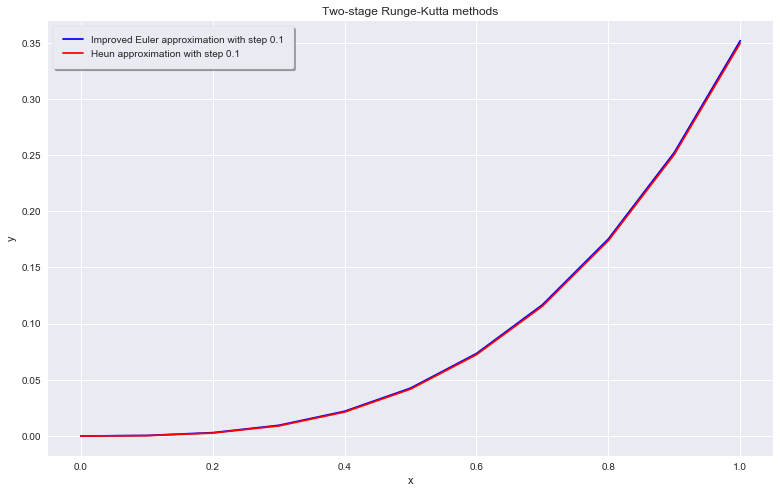

In [6]:
fig, ax = plt.subplots(figsize=(13, 8))
plt.plot(df1['x'], df1['y_improved_euler'], label='Improved Euler approximation with step 0.1', color='blue')
plt.plot(df1['x'], df1['y_heun'], label='Heun approximation with step 0.1', color='red')
plt.legend(loc='upper left', fancybox=True, framealpha=1, shadow=True, borderpad=1, frameon=True)
ax.set(title="Two-stage Runge-Kutta methods", xlabel="x", ylabel="y");

As we can see from the figure above, the solutions are nearly identical (we almost cannot distinguish between them).

### Example 2: four-stage Runge-Kutta methods

Consider the same IVP of example 1:

$$y' = x^{2} + y^{2}$$

with

$$y(0) = 0$$

We will solve this IVP using both the classical Runge-Kutta method (RK4) and its variant.

In [7]:
def example2(x_k, y_k):
    return x_k**2 + y_k**2

results = rk4(x_0=0.0, y_0=0.0, f=example2, step=0.1, k_max=10, method='classical')
x, y_classical_rk4 = extract(results)

results = rk4(x_0=0.0, y_0=0.0, f=example2, step=0.1, k_max=10, method='variant')
x, y_variant_rk4 = extract(results)

df2 = pd.DataFrame({"x": x,
                    "y_classical_rk4": y_classical_rk4,
                    "y_variant_rk4": y_variant_rk4})

df2

,x,y_classical_rk4,y_variant_rk4
0,0.0,0.000000,0.000000
1,0.1,0.000333,0.000333
2,0.2,0.002667,0.002667
3,0.3,0.009003,0.009003
4,0.4,0.021359,0.021359
5,0.5,0.041791,0.041791
6,0.6,0.072448,0.072448
7,0.7,0.115660,0.115660
8,0.8,0.174081,0.174081
9,0.9,0.250908,0.250908


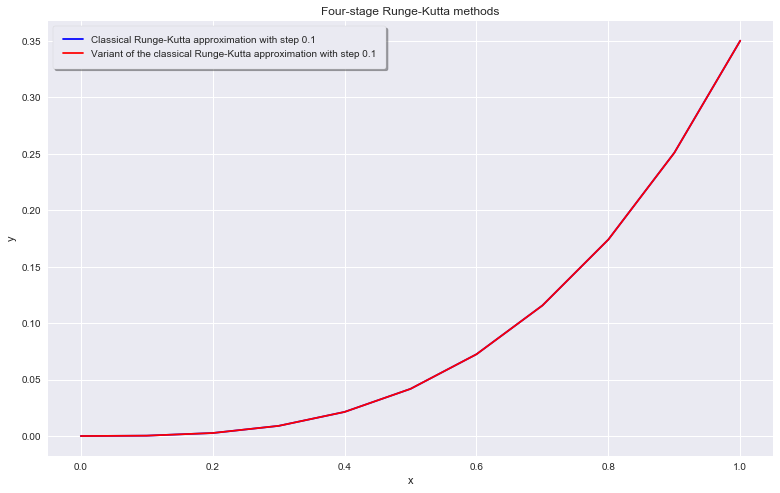

In [8]:
fig, ax = plt.subplots(figsize=(13, 8))
plt.plot(df2['x'], df2['y_classical_rk4'],
         label='Classical Runge-Kutta approximation with step 0.1', color='blue')
plt.plot(df2['x'], df2['y_variant_rk4'],
         label='Variant of the classical Runge-Kutta approximation with step 0.1', color='red')
plt.legend(loc='upper left', fancybox=True, framealpha=1, shadow=True, borderpad=1, frameon=True)
ax.set(title="Four-stage Runge-Kutta methods", xlabel="x", ylabel="y");

As we can see from the figure above, the solutions are nearly identical (we almost cannot distinguish between them).

### Example 3

Consider the following IVP:

$$y' = tan(y) + 1$$

with

$$y(0) = 1$$

for $t \in [1, 1.1]$.

We will solve this IVP using Heun's method.

In [9]:
def example3(x_k, y_k):
    return np.tan(y_k) + 1

results = rk2(x_0=1.0, y_0=1.0, f=example3, step=0.025, k_max=4, method='heun')
x, y_heun = extract(results)

df3 = pd.DataFrame({"x": x, "y_heun": y_heun})

df3

,x,y_heun
0,1.000,1.000000
1,1.025,1.066869
2,1.050,1.141332
3,1.075,1.227418
4,1.100,1.335079


### Example 4: Exercise 8 from section 8.6

The following example is actually the exercise 8 from section 8.6 of [Guidi].

Consider the following IVP:

$$y'' + (\exp(y') - 1) + y = -3\cos(t)$$

with

$$y(0) = y'(0) = 0$$

Find an approximation for the solution through the classical Runge-Kutta method for $t \in [0, 50]$ with $h = 0.01$. From the approximation obtained, find an estimative for the oscillation's amplitude for $t \in [43, 50]$ with 4 digits.

As this problem involves a second-order ODE, we must transform the variables so it becomes a system of first-order ODE:

$$u_{1} = y$$
$$u_{2} = y'$$

Since $u_{2}' = y''$, $y'' = f(t, y, y')$ becomes $u_{2}' = g(t, u_{1}, u_{2})$.

The resulting system of first-order ODE is

$$
  \begin{cases}
    u_{1}' = u_{2} \\
    u_{2}' = -3\cos(t) - \exp(u_{2}) + 1 - u_{1}
  \end{cases}
$$

In [10]:
def example4(t_k, u_k):
    return np.array([u_k[1], -3*np.cos(t_k) - np.exp(u_k[1]) + 1 - u_k[0]])

results = rk4(x_0=0.0, y_0=np.array([0.0, 0.0]), f=example4, step=0.01, k_max=5000, method='classical')
t, ys = extract(results)
y_classical, dy_classical = extract(ys)

df4 = pd.DataFrame({"t": t, "y_classical": y_classical, "dy_classical": dy_classical})

t_interval = (df4.t > 43) & (df4.t < 50)
df4_interval = df4.loc[t_interval, ["t", "y_classical"]]

max_y = df4_interval.loc[:, "y_classical"].max()
min_y = df4_interval.loc[:, "y_classical"].min()

print("The amplitude of oscilattion for t in [43, 50] is {0:.3f}.".format(max_y - min_y))

The amplitude of oscilattion for t in [43, 50] is 4.457.


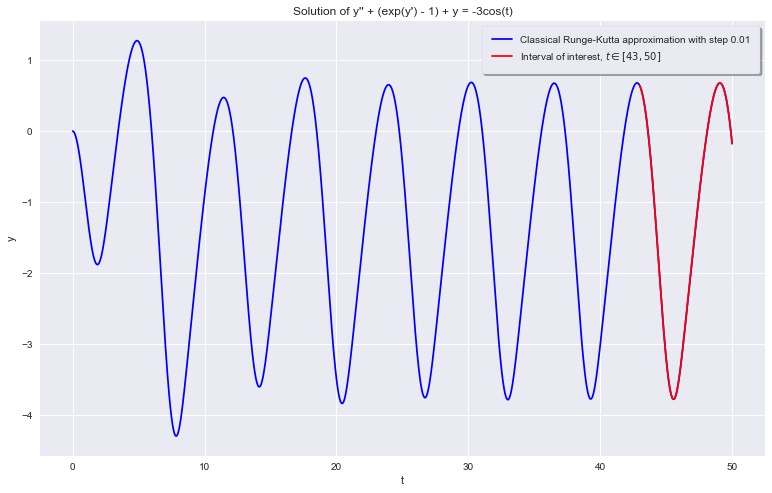

In [11]:
fig, ax = plt.subplots(figsize=(13, 8))
plt.plot(df4['t'], df4['y_classical'],
         label="Classical Runge-Kutta approximation with step 0.01", color='blue')
plt.plot(df4_interval['t'], df4_interval['y_classical'],
         label="Interval of interest, $t \in [43, 50]$", color='red')
plt.legend(loc='upper right', fancybox=True, framealpha=1, shadow=True, borderpad=1, frameon=True)
ax.set(title=r"Solution of y'' + (exp(y') - 1) + y = -3cos(t)", xlabel="t", ylabel="y");

### Question 2

In [12]:
def rk4_modified(x_0, y_0, f, step=0.001, k_max=None):
    if k_max is None: counter = itertools.count()
    else: counter = range(k_max)
        
    b1, b2, b3, b4, b5 = 1/6.0, 0.0, 0.0, 2/3.0, 1/6.0
    c2, c3, c4, c5 = 1/3.0, 1/3.0, 1/2.0, 1.0
    a21, a31, a32, a41, a42, a43, a51, a52, a53, a54 = 1/3.0, 1/6.0, 1/6.0, 1/8.0, 0.0, 3/8.0, 1/2.0, 0.0, -3/2.0, 2.0
        
    x_k = x_0
    y_k = y_0
    yield (x_k, y_k)
    for k in counter:
        k1 = f(x_k, y_k)
        k2 = f(x_k + c2 * step, y_k + a21 * step * k1)
        k3 = f(x_k + c3 * step, y_k + a31 * step * k1 + a32 * step * k2)
        k4 = f(x_k + c4 * step, y_k + a41 * step * k1 + a42 * step * k2 + a43 * step * k3)
        k5 = f(x_k + c5 * step, y_k + a51 * step * k1 + a52 * step * k2 + a53 * step * k3 + a54 * step * k4)
        
        y_k = y_k + step * (b1 * k1 + b2 * k2 + b3 * k3 + b4 * k4 + b5 * k5)
        x_k = x_k + step
        yield (x_k, y_k)

In [13]:
def question2(t, u_k):
    return np.array([(4/5.0) * u_k[0] * u_k[1] - (1/4.0) * u_k[0], -(4/5.0) * u_k[0] * u_k[1]])


results = rk4_modified(x_0=0.0, y_0=np.array([0.005, 0.995]), f=question2, step=0.0125, k_max=800)
t, i_s = extract(results)
i, s = extract(i_s)
i, s = np.array(i), np.array(s)

df5 = pd.DataFrame({"t": t, "I": i, "S": s, "R": (1 - (i + s))})
df5 = df5[["t", "I", "S", "R"]]

print("Ratio I(10)/R(10) is {:.2f}.".format(df5["I"].iloc[-1]/df5["R"].iloc[-1]))

Ratio I(10)/R(10) is 1.16.


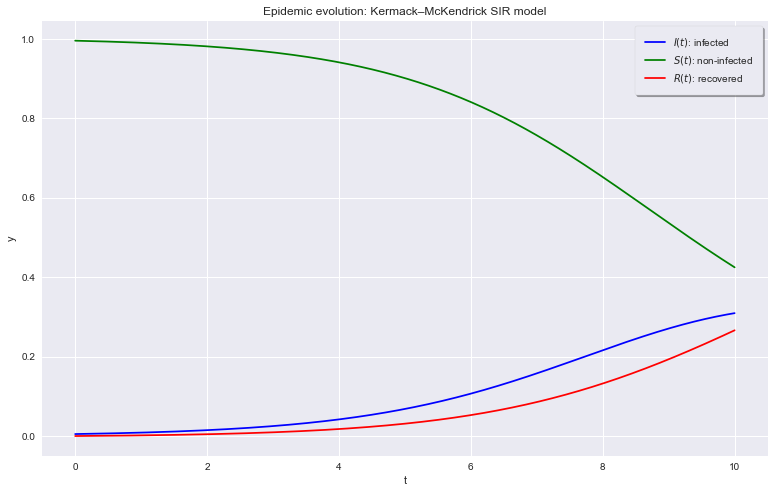

In [16]:
fig, ax = plt.subplots(figsize=(13, 8))
plt.plot(df5['t'], df5['I'],
         label="$I(t)$: infected", color='blue')
plt.plot(df5['t'], df5['S'],
         label="$S(t)$: non-infected", color='green')
plt.plot(df5['t'], df5['R'],
         label="$R(t)$: recovered", color='red')
plt.legend(loc='upper right', fancybox=True, framealpha=1, shadow=True, borderpad=1, frameon=True)
ax.set(title=r"Epidemic evolution: Kermack–McKendrick SIR model", xlabel="t", ylabel="y");

## References

* Guidi, L., Notas da disciplina Cálculo Numérico. Disponível em [Notas da disciplina Cálculo Numérico](http://www.mat.ufrgs.br/~guidi/grad/MAT01169/calculo_numerico.pdf).
* Heath, M. T., Scientific Computing: An Introductory Survey, 2nd Edition, McGraw Hill, 2002.
* Wikipedia, [Runge-Kutta methods](https://en.wikipedia.org/wiki/Runge%E2%80%93Kutta_methods).